In [16]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

In [17]:
boston = load_boston()

X = boston.data
y = boston.target

In [18]:
# normallise dataset 
# each feature must have 0 mean and unit variance

u  = np.mean(X,axis=0)
std = np.std(X,axis=0)
     
# print(u.shape,std.shape)

#normalisation

X = (X-u)/std

In [19]:
print(X.shape,y.shape)

(506, 13) (506,)


In [20]:
# adding a dummy column of ones 

ones = np.ones((X.shape[0],1))
#print(ones)

# update matrix

X = np.hstack((ones,X))

print(X.shape)

(506, 14)


In [21]:
X[:4,:4]

array([[ 1.        , -0.41978194,  0.28482986, -1.2879095 ],
       [ 1.        , -0.41733926, -0.48772236, -0.59338101],
       [ 1.        , -0.41734159, -0.48772236, -0.59338101],
       [ 1.        , -0.41675042, -0.48772236, -1.30687771]])

In [22]:
# x - Vector (Single Example with n features)

def hypothesis(x,theta):
    y_ = 0.0
    n = x.shape[0]
    for i in range(n):
        y_  += (theta[i]*x[i])
    return y_

def error(X,y,theta):
    e = 0.0
    m = X.shape[0]
    
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        e += (y[i] - y_)**2
        
    return e/m

def gradient(X,y,theta):
    m,n = X.shape
    
    grad = np.zeros((n,))
    
    # for all values of j
    for j in range(n):
        #sum over all examples
        for i in range(m):
            y_ = hypothesis(X[i],theta)
            grad[j] += (y_ - y[i])*X[i][j]
    # Out of the loops
    return grad/m

def gradient_descent(X,y,learning_rate=0.1,max_epochs=300):
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_epochs):
        e = error(X,y,theta)
        error_list.append(e)
        
        # Gradient Descent
        grad = gradient(X,y,theta)
        for j in range(n):
            theta[j] = theta[j] - learning_rate*grad[j]
        
    return theta,error_list

In [23]:
theta,error_list = gradient_descent(X,y)

In [24]:
print(theta)

[ 2.25328063e+01 -9.03091692e-01  1.03815625e+00  1.53477685e-02
  6.99554920e-01 -2.02101672e+00  2.70014278e+00 -1.93085233e-03
 -3.10234837e+00  2.34354753e+00 -1.72031485e+00 -2.04614394e+00
  8.47845679e-01 -3.73089521e+00]


In [25]:

import time
start = time.time()
theta,error_list = gradient_descent(X,y)
end = time.time()
print("Time taken is ", end-start)

Time taken is  16.111788511276245


Quite Slow! 18 Seconds! Just 506 examples in the training data!¶

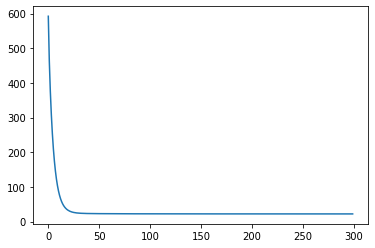

In [26]:
import matplotlib.pyplot as plt
plt.plot(error_list)
plt.show()

Predictions

In [29]:
y_ = []
m=X.shape[0]
for i in range(m):
    pred = hypothesis(X[i],theta)
    y_.append(pred)
y_ = np.array(y_)

In [30]:

def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score*100

In [31]:
# SCORE
r2_score(y,y_)

74.04541323942743